# ME 364 Midterm Project - Part 1

For this part, you will use the latest version of the United States Wind Turbine Database (USWTDB),
which you can download from https://eerscmap.usgs.gov/uswtdb/assets/data/uswtdbCSV.zip.
You can find out more about the data and the dictionary file describing the parameters on this page
https://www.sciencebase.gov/catalog/item/6001e327d34e592d8671fae0 (dictionary file name
is “EntityandAttribute DataDictionary.csv”) Use this data set to answer the following questions.

In [2]:
# Import packages and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/yairg98/Data-Driven-Problem-Solving/main/Midterm%20Project/Part%201/uswtdb_v4_3_20220114.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")

---
**1) How many rows do we have in this data set? Find the number of missing values in the data
set. Find and report the number of missing values in each column.**

In [3]:
# Number of rows in dataset
rows = len(df.index)
print("Number of rows in dataset: {}".format(rows))

# Number of missing values in dataset
missing = df.isnull().sum()
print("Total number of values missing: {}".format(missing.sum()))
print("Number of missing values in each column:")
print(missing)

Number of rows in dataset: 70808
Total number of values missing: 168610
Number of missing values in each column:
case_id              0
faa_ors           5792
faa_asn           5122
usgs_pr_id       32545
eia_id            5793
t_state              0
t_county             0
t_fips               0
p_name               0
p_year             613
p_tnum               0
p_cap             4482
t_manu            5640
t_model           5777
t_cap             5480
t_hh              6180
t_rd              5934
t_rsa             5934
t_ttlh            6180
retrofit             0
retrofit_year    64822
t_conf_atr           0
t_conf_loc           0
t_img_date        8316
t_img_srce           0
xlong                0
ylat                 0
dtype: int64


#### Notes On Missing Data

A cursory visual inspection of the data reveals that the data points
relating to physical characteristics of the turbines tend to be missing
in sets. For example, a typical entry that is missing the t_rd value is
also missing the values for t_ttlh, t_rsa, t_hh, t_cap, t_model, t_manu,
and p_cap. Therefore, observed patterns and correlations between those
features would not be impacted by the missing data.

As shown below, the distribution of that missing data by year is highly
unbalanced. The technical characteristics of turbines from some years
are very well documented, while other years are missing every or nearly
every value for categories. As a result, the data presented below on the
annual national turbine capacity is likely inacurate forthose years for
which the dataset is missing many of those values.

As also shown below, certain forms and records are missing from earlier
years, presumably because they were not yet standardized before then.
These values (faa_ors, faa_asn, and eia_id) are also frequently missing
as a set, though not always.

In [4]:
# Analyzing the missing data by year
total_entries_by_year = df['p_year'].value_counts()
num_missing_by_year = df.groupby('p_year').apply(lambda x: x.isnull().sum())
percent_missing_by_year = df.groupby('p_year').apply(lambda x: x.isnull().mean())

# Missing technical specs by year (columns 1-7)
# Missing forms, identifiers, and records by year (columns 8-10)
percent_missing_by_year[[
    't_ttlh','t_rsa','t_hh','t_cap','t_model','t_manu','p_cap',
    'faa_ors','faa_asn','eia_id']]

,t_ttlh,t_rsa,t_hh,t_cap,t_model,t_manu,p_cap,faa_ors,faa_asn,eia_id
p_year,,,,,,,,,,
1981.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1982.0,1.000000,1.000000,1.000000,0.995699,0.995699,0.995699,0.766667,0.995699,0.995699,0.765591
1983.0,0.002309,0.002309,0.002309,0.002309,0.002309,0.002309,0.002309,0.997691,0.997691,0.002309
1984.0,0.870968,0.006452,0.870968,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
1985.0,0.602713,0.441860,0.602713,0.426357,0.682171,0.426357,0.000000,1.000000,1.000000,0.397287
1986.0,0.291139,0.278481,0.291139,0.000000,0.000000,0.000000,0.000000,0.974684,0.974684,0.012658
1987.0,1.000000,1.000000,1.000000,0.072539,0.088083,0.072539,0.000000,1.000000,1.000000,0.000000
1988.0,1.000000,1.000000,1.000000,0.000000,0.993827,0.993827,0.000000,0.993827,0.993827,0.000000
1989.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.006944


---
**2) In which states and which counties the highest capacity turbines are installed?**

In [5]:
# Identify the maximum capacity of turbines in the dataset
max_cap = df['t_cap'].max()

# Get data for max-capacity turbines
max_cap_data = df[df['t_cap'] == max_cap]

# Filter out duplicate lcoations
max_cap_locations = max_cap_data.drop_duplicates(subset=['t_state','t_county'])

# Print list of unique states/counties housing max-capacity turbines 
print(max_cap_locations[['t_state','t_county']].to_string(index=False))

t_state           t_county
     RI  Washington County
     VA Northampton County


---
**3) Based on the data available, where was the first wind turbine project installed in the US?
(provide the state and county and the year)**

In [6]:
# Sort entries by year and retrieve information from first entry
print(df.sort_values(by=['p_year'])
    .head(1)[['t_state','t_county','p_year']]
    .to_string(index=False))

t_state         t_county  p_year
     CA Riverside County  1981.0


---
**4) How many projects were installed and become operational during 2020? Which state had the
most number of projects during 2020? How many? Which had the least number of projects?
How many?**

In [7]:
# Create new dataframe of only 2020 entries
new_turbines = df[df['p_year']==2020]

# Limit to one entry per project (instead of per turbine)
new_projects = new_turbines.drop_duplicates(subset=['p_name'])

# Number of new projects installed in 2020
num_projects = len(new_projects.index)
print("Total new projects installed in 2020: {}".format(num_projects))

# States with most 2020 project installations
num_projects_by_state = new_projects['t_state'].value_counts()
most_new_projects = num_projects_by_state.head(1).to_dict()
print("State with most project installations in 2020:")
print(most_new_projects)

# The fewest 2020 project installations for any state was zero
# Tied between several states, some of which are not preent in the database at all

# List of all states
all_states = [
    'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
    'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
    'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
    'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
    'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

# List of states with no 2020 project installations
no_proj_states = [x for x in all_states if x not in pd.unique(new_projects['t_state'])]
print("The following states had zero new project installations in 2020:")
print(no_proj_states)

Total new projects installed in 2020: 128
State with most project installations in 2020:
{'TX': 22}
The following states had zero new project installations in 2020:
['AK', 'AL', 'AR', 'CT', 'DC', 'DE', 'FL', 'GA', 'ID', 'KY', 'LA', 'MA', 'MD', 'MS', 'NC', 'NH', 'NJ', 'NV', 'PA', 'RI', 'SC', 'TN', 'UT', 'VA', 'VT', 'WI']


---
**5) How many turbines have been installed in California? How many turbines have been installed
in New York?**

In [8]:
ca_turbines = df[df['t_state']=='CA']
ny_turbines = df[df['t_state']=='NY']

n_t_ca = len(ca_turbines.index)
n_t_ny = len(ny_turbines.index)

print("Number of turbines installed in California: {}".format(n_t_ca))
print("Number of turbines installed in New York: {}".format(n_t_ny))

Number of turbines installed in California: 6065
Number of turbines installed in New York: 1197


---
**6) How many projects have been installed in California? How many projects have been installed
in New York? What are the projects with most number of turbines in each of these states?
How many turbines are installed in these projects?**

In [9]:
# Create dataframe of projects by state
ca_projects = ca_turbines.drop_duplicates(subset= ['p_name'])
ny_projects = ny_turbines.drop_duplicates(subset= ['p_name'])

# Count projects in each state
n_p_ca = len(ca_projects.index)
n_p_ny = len(ny_projects.index)

# Print above results
print("Number of projects installed in California: {}".format(n_p_ca))
print("Number of projects installed in New York: {}".format(n_p_ny))

# Count turbines in each proect for NY and CA
ca_proj_sizes = ca_turbines.value_counts(subset=['p_name'])
ny_proj_sizes = ny_turbines.value_counts(subset=['p_name'])

# Return project from each state with most turbines
print("CA project with most turbines: {} - {} turbines"
    .format(ca_proj_sizes.index[0][0], ca_proj_sizes.iloc[0]))
print("NY project with most turbines: {} - {} turbines"
    .format(ny_proj_sizes.index[0][0], ny_proj_sizes.iloc[0]))

Number of projects installed in California: 128
Number of projects installed in New York: 44
CA project with most turbines: unknown Tehachapi Wind Resource Area 1 - 713 turbines
NY project with most turbines: Maple Ridge - 112 turbines


**7) Provide one histogram showing the distribution of turbines’ rotor diameters and another histogram showing the distribution of turbines’ capacities.**

Text(0.5, 1.0, 'Turbine Capacity Distribution')

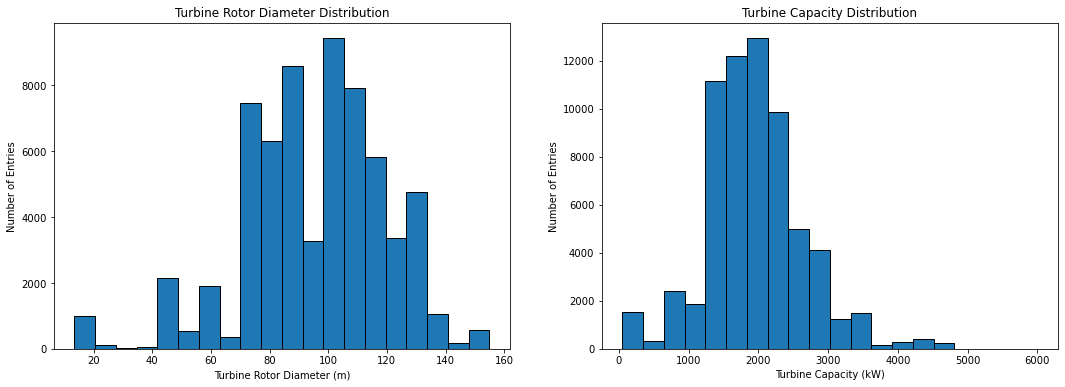

In [10]:
# Create figure
fig, axs = plt.subplots(1,2,figsize=(18,6))

# Plot 1: distribution of turbines' rotor diameters
axs[0].hist(df['t_rd'], bins=20, ec='k')
axs[0].set_xlabel("Turbine Rotor Diameter (m)")
axs[0].set_ylabel("Number of Entries")
axs[0].set_title("Turbine Rotor Diameter Distribution")

# Plot 2: distribution of turbines' capacities
axs[1].hist(df['t_cap'], bins=20, ec='k')
axs[1].set_xlabel("Turbine Capacity (kW)")
axs[1].set_ylabel("Number of Entries")
axs[1].set_title("Turbine Capacity Distribution")

---
**8) Visualize the annual installed wind turbine capacity in the US. Use the appropriate type of
plot that can effectively show the trend and communicate it well.**

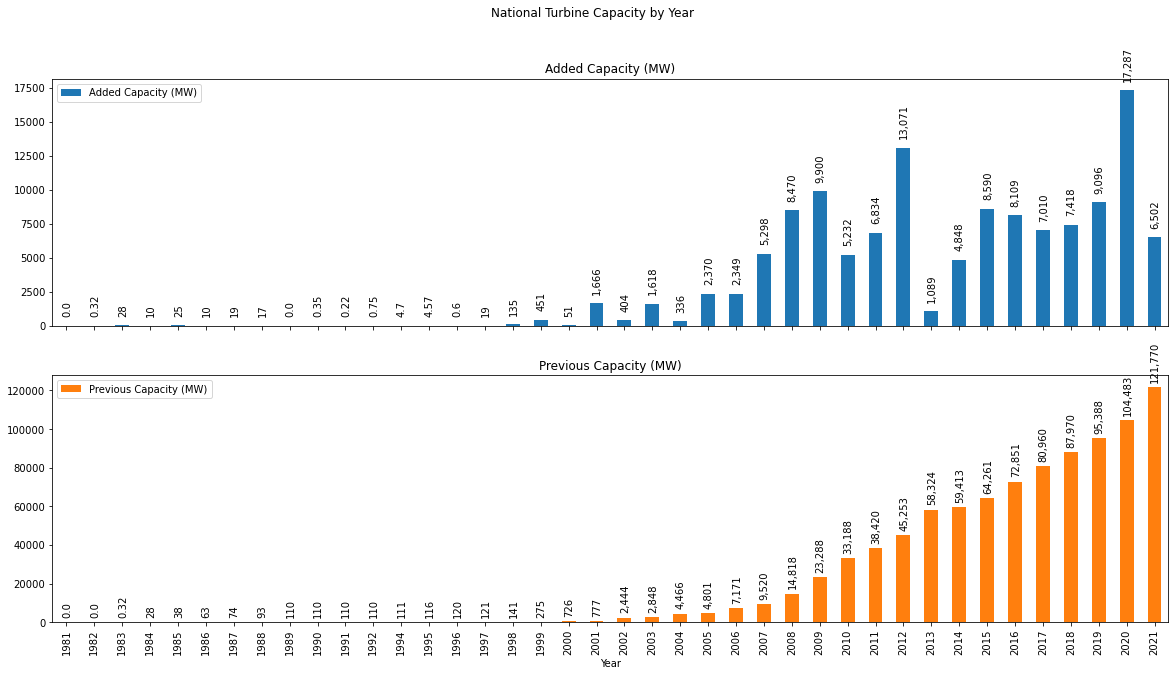

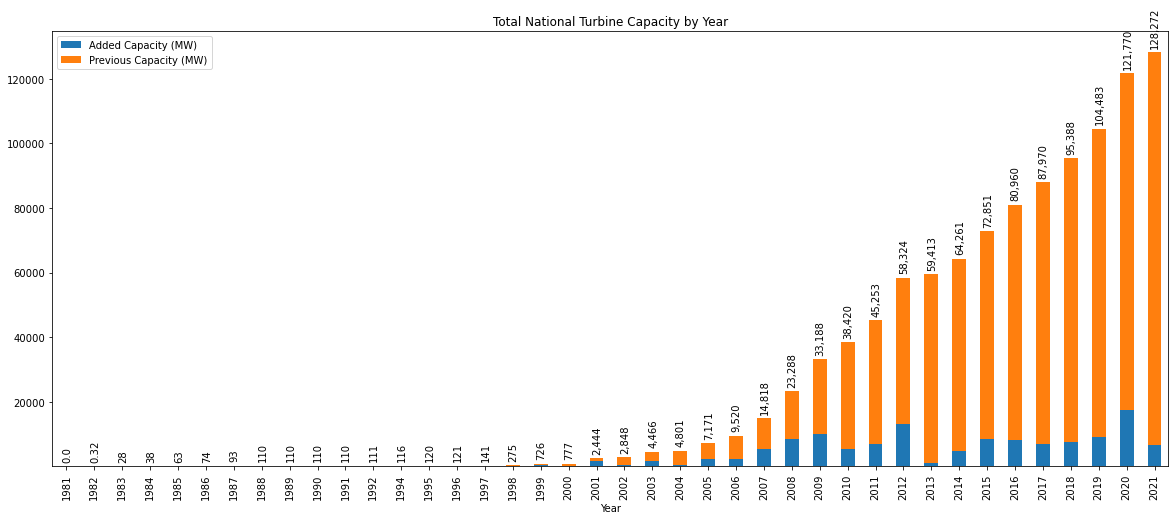

In [11]:
# Create a new dataframe containing data on the annual national turbine turbine capacity created

# List, clean, and sort all unique years present in the database
years = pd.unique(df['p_year']) 
years = np.array([int(yr) for yr in years if not np.isnan(yr)])
years.sort()

# Compile total new turbine capactity added each year
new_capacity = [df.loc[df['p_year'] == yr, 't_cap'].sum()/1e3 for yr in years]

# Compile total turbine capacity nationally at the start of each year
prev_capacity = [df.loc[df['p_year'] < yr, 't_cap'].sum()/1e3 for yr in years]

# Create new dataframe from turbine capacity data
annual_cap_data = {
    "Year": years,
    "Added Capacity (MW)": new_capacity,
    "Previous Capacity (MW)": prev_capacity
}
annual_cap = pd.DataFrame(annual_cap_data)

# Creat subplots for added and previous annual turbine capacity
subplots = annual_cap.plot(x='Year', kind='bar', subplots=True,
        title='National Turbine Capacity by Year', figsize=(20,10))

# Create stacked bar plot for total annual turbine capacity
stacked = annual_cap.plot(x='Year', kind='bar', stacked=True,
        title='Total National Turbine Capacity by Year', figsize=(20,8))

for index, value in enumerate(prev_capacity):
    subplots[1].text(index-.15, value+3500, "{:,}".format(round(value,(None if value>10 else 2))), rotation=90)

for index, value in enumerate(new_capacity):
    subplots[0].text(index-.15, value+800, "{:,}".format(round(value,(None if value>10 else 2))), rotation=90)

for index, value in enumerate(new_capacity):
    value += prev_capacity[index]
    stacked.text(index-.15, value+2000, "{:,}".format(round(value,(None if value>10 else 2))), rotation=90)

---
**9) Create a pivot table showing total turbine capacity for CA, IA, KS, OK, TX during years
2017, 2018, 2019, and 2020.**

In [18]:
table = pd.pivot_table(df[df['p_year']>=2017], values='t_cap', index=['t_state'],
    columns=['p_year'], aggfunc=np.nansum)

table = table.loc[['CA', 'IA', 'KS', 'OK', 'TX']]
table


p_year,2017.0,2018.0,2019.0,2020.0,2021.0
t_state,,,,,
CA,47400.0,329850.0,132800.0,107400.0,230850.0
IA,397470.0,1098825.0,1726800.0,1487560.0,152000.0
KS,658800.0,543050.0,469650.0,892305.0,301000.0
OK,850725.0,543245.0,96600.0,1147570.0,481580.0
TX,2305115.0,2249980.0,3922655.0,4164745.0,1986305.0


---
**10) What variables in the data set are correlated with a Pearson correlation coefficient greater
than 0.87? Do the correlations between these variables make sense to you?**

In [13]:
# Find the absolute pairwise correlation between columns of the database
corr = df.corr(method ='pearson').abs()

# Convert corr matrix to list form and remove redundancies
# Source: https://stackoverflow.com/a/43073761
corr_list = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

# Get list of column pairs with correlation coefficients >= .87
threshold = 0.87
high_corr = corr_list.index[corr_list >= threshold]

print("Variable pairs with Pearson correlation coefficient greater than 0.87:")
print(*high_corr, sep='\n')

Variable pairs with Pearson correlation coefficient greater than 0.87:
('t_rd', 't_rsa')
('t_hh', 't_ttlh')
('t_rd', 't_ttlh')
('p_year', 't_rd')
('t_rsa', 't_ttlh')
('t_cap', 't_rsa')
('t_cap', 't_rd')


*The set of highly correlated variable pairs make sense in that they
all relate to intuitively linked physical characteristics of turbines.*

*The one exception to that category is p_year, the year in which the
project was installed. The high correlation between the year and
rotor-diameter of the turbines suggests that the diameter of a typical
new turbine rotor has increased over time, likely as the better designs,
technology, and materials have become available.*

---
**11) If you want to use one parameter to predict turbine capacity, what would it be? How did you
decide about it? If you can use two parameters to predict turbine capacity, what would they
be? How about three parameters? Explain how you decide about these parameters.**

In [14]:
t_cap_corr = corr['t_cap'].sort_values(ascending=False)[1:]

print("Most predictive parameter for t_cap: {}"
            .format([t_cap_corr.index[0]]))

print("Most predictive pair of parameters for t_cap: {}"
            .format(list(t_cap_corr.index[:2])))

print("Most predictive three parameters for t_cap: {}"
            .format(list(t_cap_corr.index[:3])))

Most predictive parameter for t_cap: ['t_rsa']
Most predictive pair of parameters for t_cap: ['t_rsa', 't_rd']
Most predictive three parameters for t_cap: ['t_rsa', 't_rd', 't_ttlh']


Note that the parameters most correlated with t_cap are also highly
correlated with one another. Therefore, it would be appropriate in this
case to use some method that would decorelate t_cap's predictive
parameters, such as PCA or a proxy variable.